# EDA File

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Data

In [2]:
df = pd.read_csv('./data/train.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [74]:
def data_preprocessing(df):
    df1 = df.copy()
    null_counts = df1.isnull().sum()/len(df1)
    drop_columns = (null_counts[null_counts > 0.8]).index # columns with more than 80% missing values
    df1.drop(drop_columns, axis=1, inplace=True)
    
    y_train = np.log1p(df1['SalePrice'])
    
    return df1, y_train

In [75]:
df_train, y_train = data_preprocessing(df)

In [47]:
null_counts = df_train.isnull().sum() / len(df_train)

In [70]:
null_columns = list(null_counts[null_counts > 0].index)

In [76]:
df_train[null_columns].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

### Imputation

<Axes: xlabel='LotFrontage', ylabel='Count'>

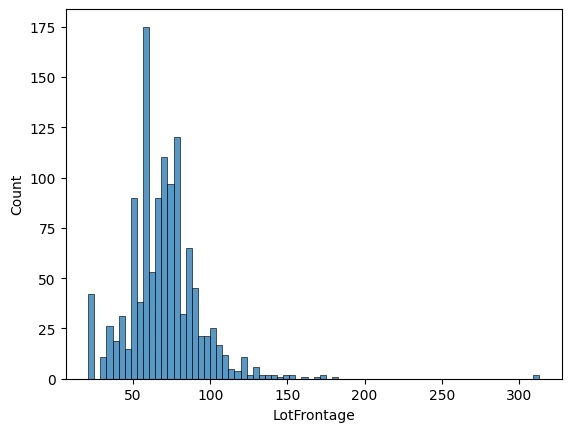

In [77]:
sns.histplot(df_train['LotFrontage'])

There are three ways to impute this column. Lets see one by one 

1. df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


In [81]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_57154/3505941688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


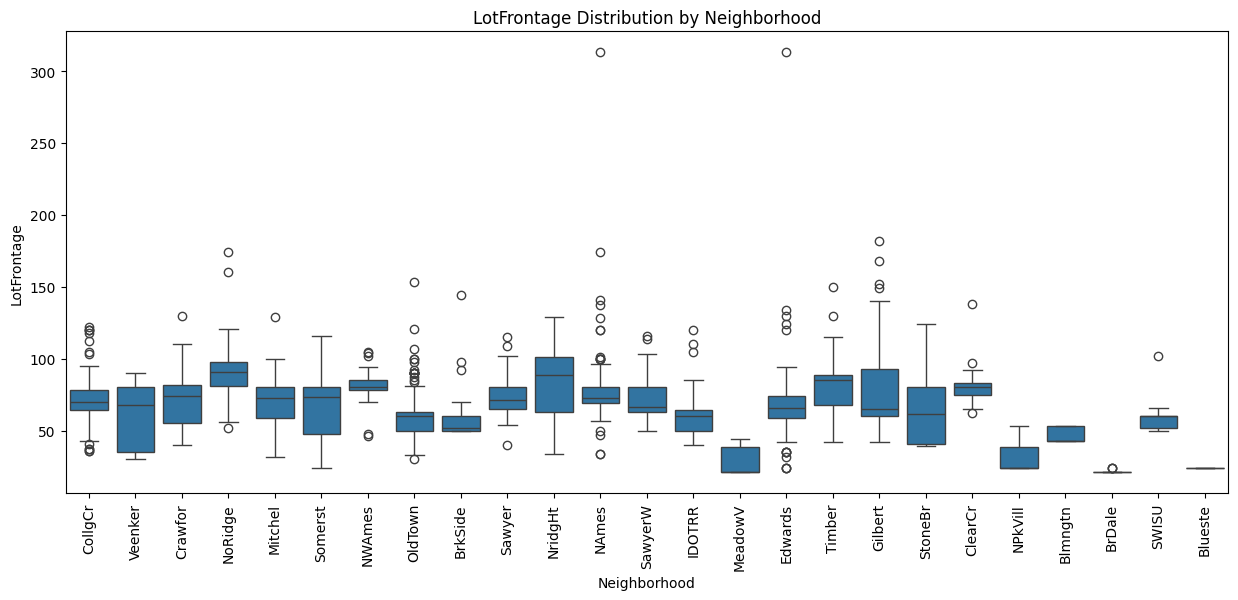

In [83]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Neighborhood', y='LotFrontage', data=df_train)
plt.xticks(rotation=90)
plt.title('LotFrontage Distribution by Neighborhood')
plt.show()
